# CIFAR - 100

In this notebook, we train a CNN to classify images from the CIFAR-10 database.

### Load CIFAR-100 Database

In [7]:
import keras
from keras.datasets import cifar100

# Import train and test data
(X_train, y_train),(X_test, y_test) = cifar100.load_data()

### Visualizing Training Images

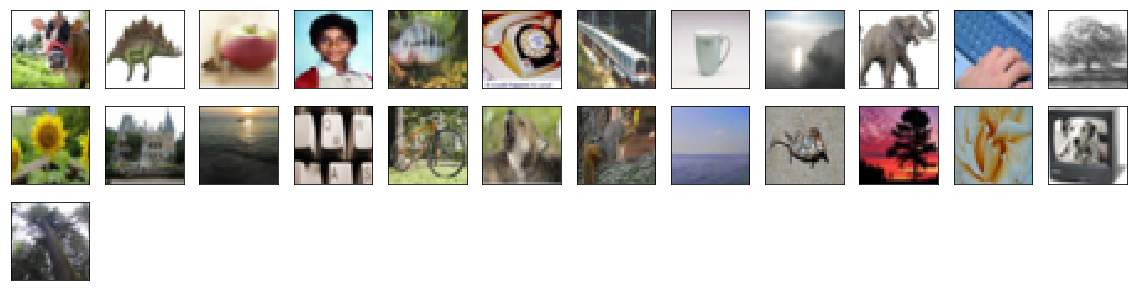

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20, 5))
for i in range(25):
    ax = fig.add_subplot(3, 12, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_train[i]))

### Rescale Images by dividing each pixel in every Image by 255

In [9]:
# Rescale [0,255] --> [0, 1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [10]:
from keras.utils import np_utils

# One-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Dividing training set into training and validation sets
(X_train, X_valid) = X_train[5000:], X_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print the shape of training set
print('X_train shape:', X_train.shape)

# print number of training, validation, and test images
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print(X_valid.shape[0], 'validation samples')

X_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


### Define the Model Architecture

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 64)          0         
__________

### Compile the model

In [14]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### Train the model

In [16]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=32, epochs=100,validation_data=(X_valid, y_valid), 
                 callbacks=[checkpointer], verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
Epoch 00000: val_loss improved from inf to 3.34645, saving model to model.weights.best.hdf5
62s - loss: 3.8765 - acc: 0.1112 - val_loss: 3.3464 - val_acc: 0.1960
Epoch 2/100
Epoch 00001: val_loss improved from 3.34645 to 3.16852, saving model to model.weights.best.hdf5
62s - loss: 3.2893 - acc: 0.2079 - val_loss: 3.1685 - val_acc: 0.2272
Epoch 3/100
Epoch 00002: val_loss improved from 3.16852 to 3.02532, saving model to model.weights.best.hdf5
62s - loss: 3.0563 - acc: 0.2501 - val_loss: 3.0253 - val_acc: 0.2582
Epoch 4/100
Epoch 00003: val_loss improved from 3.02532 to 2.93881, saving model to model.weights.best.hdf5
63s - loss: 2.9111 - acc: 0.2805 - val_loss: 2.9388 - val_acc: 0.2778
Epoch 5/100
Epoch 00004: val_loss improved from 2.93881 to 2.75376, saving model to model.weights.best.hdf5
62s - loss: 2.8256 - acc: 0.2999 - val_loss: 2.7538 - val_acc: 0.3174
Epoch 6/100
Epoch 00005: val_loss did not improve
64s - loss: 2.7

Epoch 00064: val_loss did not improve
61s - loss: 3.5913 - acc: 0.1713 - val_loss: 3.4591 - val_acc: 0.1762
Epoch 66/100
Epoch 00065: val_loss did not improve
61s - loss: 3.5861 - acc: 0.1739 - val_loss: 3.5619 - val_acc: 0.1496
Epoch 67/100
Epoch 00066: val_loss did not improve
61s - loss: 3.5941 - acc: 0.1706 - val_loss: 3.4297 - val_acc: 0.1956
Epoch 68/100
Epoch 00067: val_loss did not improve
61s - loss: 3.5944 - acc: 0.1684 - val_loss: 3.6742 - val_acc: 0.1686
Epoch 69/100
Epoch 00068: val_loss did not improve
61s - loss: 3.6062 - acc: 0.1690 - val_loss: 3.7274 - val_acc: 0.1650
Epoch 70/100
Epoch 00069: val_loss did not improve
61s - loss: 3.6095 - acc: 0.1639 - val_loss: 3.3195 - val_acc: 0.2064
Epoch 71/100
Epoch 00070: val_loss did not improve
61s - loss: 3.5996 - acc: 0.1667 - val_loss: 3.4365 - val_acc: 0.1838
Epoch 72/100
Epoch 00071: val_loss did not improve
61s - loss: 3.6122 - acc: 0.1650 - val_loss: 3.3110 - val_acc: 0.2096
Epoch 73/100
Epoch 00072: val_loss did not im

### Load the model with the best accuracy

In [17]:
# load the weights of the model with best validation accuracy
model.load_weights('model.weights.best.hdf5')

### Calculate Classificaition Accuracy on Test Set

In [19]:
# Score trained model
score = model.evaluate(X_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.3691
